# 9. Decision Trees

**Purpose:** Learn and revise **Decision Trees** for classification and regression in Scikit-learn.

---

## What is a Decision Tree?

A **decision tree** is a model that splits the feature space into regions using **if-then rules**. Each internal node tests one feature (e.g. "is \( x_1 \leq 5 \)?"), and each leaf assigns a **prediction** (class label or constant value).

- **Classification:** Leaf = majority class; split chosen to maximize **information gain** (e.g. Gini impurity or entropy).
- **Regression:** Leaf = mean of \( y \) in that region; split chosen to minimize **MSE** (or similar).

**Key idea:** No need to scale features; handles non-linearity; interpretable; prone to **overfitting** if grown deep (control with **max_depth**, **min_samples_leaf**).

## Concepts to Remember

| Concept | Description |
|--------|-------------|
| **Gini impurity** | \( 1 - \sum_k p_k^2 \); measure of node "mixedness"; split to reduce it. |
| **Entropy** | \( -\sum_k p_k \log p_k \); alternative criterion for splits. |
| **max_depth** | Limit tree depth to reduce overfitting. |
| **min_samples_leaf** | Minimum samples in a leaf; larger = simpler tree. |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
np.random.seed(42)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.94      0.84      0.89        19

    accuracy                           0.90        40
   macro avg       0.91      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



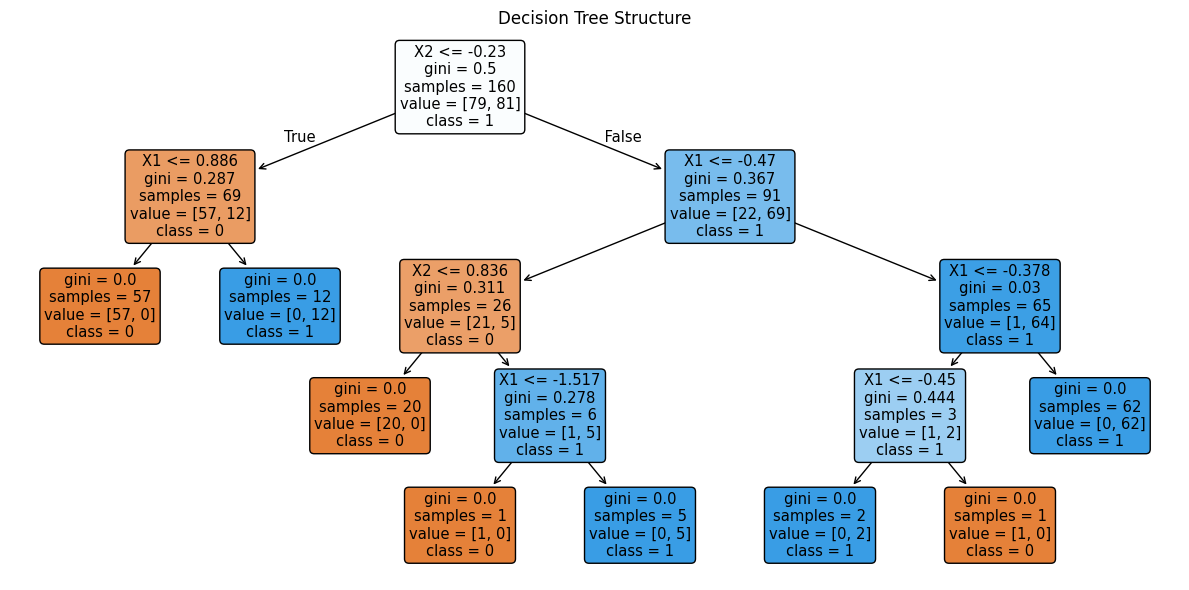

In [4]:
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=["X1", "X2"], class_names=["0", "1"], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.tight_layout()
plt.show()

## Key Takeaways

- **DecisionTreeClassifier** / **DecisionTreeRegressor**; use **max_depth** and **min_samples_leaf** to avoid overfitting.
- **plot_tree** visualizes the tree; **feature_importances_** shows which features matter most.
- No feature scaling needed; works with mixed feature types (after encoding).